### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import zscore
import seaborn as sns
%matplotlib inline

In [2]:
# reading the CSV file into pandas dataframe
vehicle_df = pd.read_csv("vehicle.csv") 

In [3]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
vehicle_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [5]:
vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [25]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### Check for any missing values in the data 

In [19]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [13]:
vehicle_df['circularity'].isnull().sum()

5

In [15]:
vehicle_df['circularity'].isnull().fillna(0.0)

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
816    False
817    False
818    False
819    False
820    False
821    False
822    False
823    False
824    False
825    False
826    False
827    False
828    False
829    False
830    False
831    False
832    False
833    False
834    False
835    False
836    False
837    False
838    False
839    False
840    False
841    False
842    False
843    False
844    False
845    False
Name: circularity, Length: 846, dtype: bool

In [20]:
vehicle_df=vehicle_df.fillna(0.0)

In [21]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [22]:
vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [36]:
vehicle_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

### 3. Standardize the data 

In [28]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [31]:
vehicle_df['class']=le.fit_transform(vehicle_df['class'])

In [72]:
from scipy.stats import zscore
vehicle_df_std=vehicle_df.apply(zscore)
vehicle_df_std=pd.DataFrame(vehicle_df_std)
vehicle_df_std_1=pd.DataFrame(vehicle_df_std)

In [39]:
vehicle_df_std.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.160580,0.488951,0.076470,0.284286,1.241960,0.311542,-0.198998,0.140516,-0.178035,0.758332,-0.359415,-0.334694,0.288657,-0.234766,-0.064746,0.381885,-0.189712,0.183957,1.457086
1,-0.325470,-0.507116,0.136316,-0.735976,-0.537879,0.094079,-0.584991,0.518700,-0.527497,-0.344578,-0.539691,-0.610532,-0.484799,-0.011732,0.543864,0.158072,0.033976,0.452977,1.457086
2,1.254193,0.773541,1.452926,1.139100,0.530024,0.311542,1.137132,-1.120101,0.870349,0.689401,1.052745,1.106421,1.359595,0.099786,1.558214,-0.401462,-0.077868,0.049447,0.032005
3,-0.082445,-0.507116,0.016624,-0.239632,0.174057,0.094079,-0.733450,0.644762,-0.527497,-0.344578,-0.840150,-0.728748,-1.406996,-1.015388,-0.064746,-0.289555,1.152416,1.529056,1.457086
4,-1.054545,-0.080230,-0.701527,1.028802,4.920292,9.444962,-0.584991,0.518700,-0.527497,-0.275646,1.593572,-0.638679,0.407650,6.121723,0.543864,-0.177649,-0.972619,-1.699181,-1.393075
5,1.618730,-6.341220,1.452926,0.118838,-1.368470,-0.558308,2.562337,-1.876471,2.617656,1.447652,2.765364,2.919073,2.668520,1.437994,-0.267616,-0.401462,-0.860775,-1.699181,-1.393075
6,0.403605,-0.222525,-0.521989,0.146413,0.411368,-0.558308,-0.466224,0.140516,-0.527497,-0.344578,-0.359415,-0.436022,-0.068323,-0.680836,1.355344,-1.296716,1.264260,1.125526,-1.393075
7,-0.446982,-0.222525,-0.940911,-0.294781,0.411368,0.094079,-0.941293,0.896885,-0.876958,-0.137782,-0.780058,-0.886370,-0.306309,-0.569319,-0.673356,-1.072903,0.481352,0.856507,1.457086
8,-0.933032,-1.503182,-1.180294,-0.763551,-0.063255,-0.340845,-1.386669,1.653255,-1.226420,-1.447489,-1.411023,-1.212873,-1.853220,-0.903871,-0.876225,0.158072,1.264260,1.663566,1.457086
9,-0.082445,-0.080230,0.974158,-4.624002,0.055401,0.529004,0.424529,-0.615854,0.520888,-0.137782,0.421780,0.374605,-0.663288,-0.903871,-0.470486,0.158072,0.705040,1.125526,0.032005


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [42]:
from sklearn.cluster import KMeans

### K - Means Clustering

In [59]:
km = KMeans(n_clusters=3)
km.fit(vehicle_df_std)
vehicle_df_std['clusteredLables']=km.predict(vehicle_df_std)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C68C636D8>,
      dtype=object)

<Figure size 21600x14400 with 0 Axes>

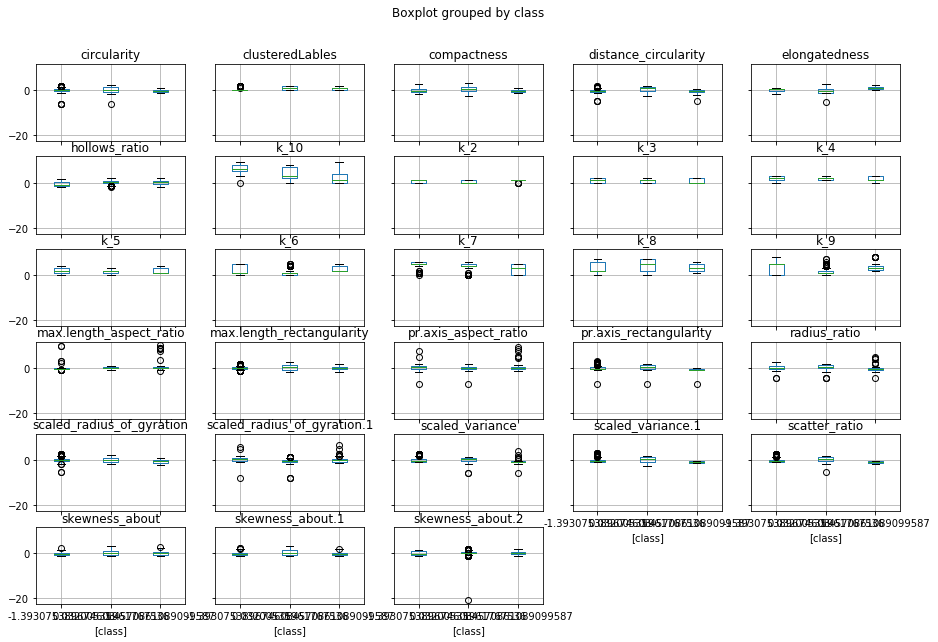

In [60]:
plt.figure(figsize=(300,200))
#plt.boxplot(vehicle_df_std)
vehicle_df_std.boxplot(by = 'class',  figsize=(15, 10))
#sns.boxplot(orient="h", palette="Set2",data=vehicle_df_std)

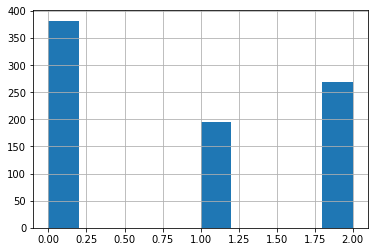

In [61]:
vehicle_df_std["clusteredLables"].hist()

In [62]:
vehicle_df_std["class"].value_counts()

 0.032005    429
-1.393075    218
 1.457086    199
Name: class, dtype: int64

### 4. Assign a dummy array called distortion

In [63]:
sse_df=pd.DataFrame(columns=['K','SSE'])


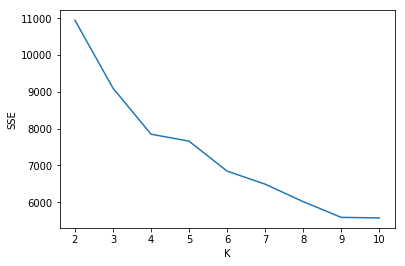

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [66]:
for i in range(2,11):
    km= KMeans(n_clusters=i)
    km.fit(vehicle_df_std)
    vehicle_df_std['k_'+str(i)]=km.predict(vehicle_df_std)
    sse_df.loc[sse_df.shape[0]]=[i,km.inertia_]

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

C:\Users\kotav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


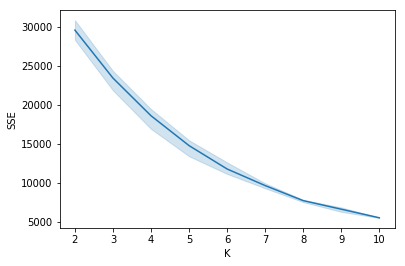

In [67]:
sns.lineplot(x="K",y="SSE", data=sse_df)

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [73]:
km = KMeans(n_clusters=4)
km.fit(vehicle_df_std_1)
vehicle_df_std_1['clusteredLables']=km.predict(vehicle_df_std_1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C668002E8>,
      dtype=object)

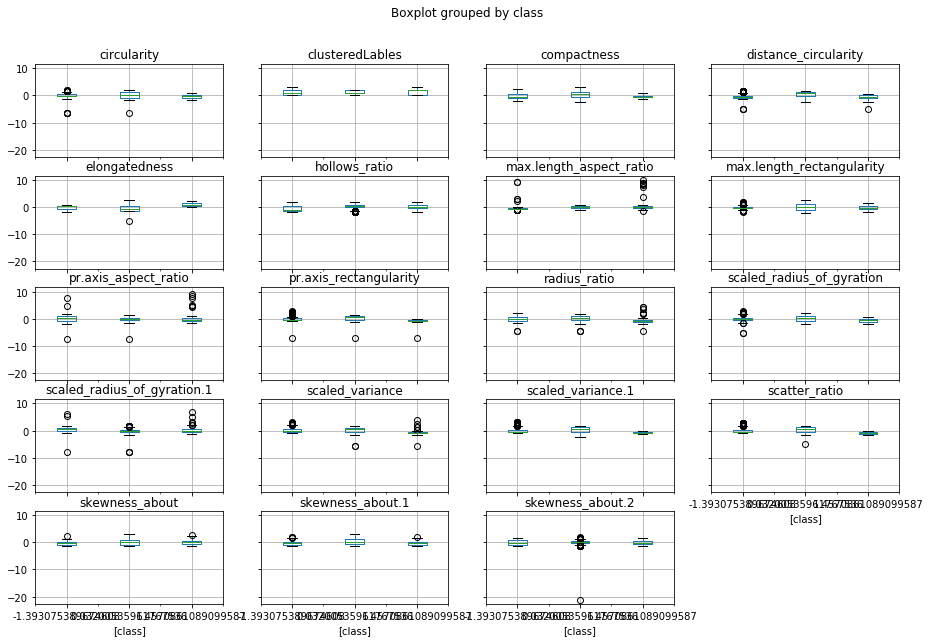

In [74]:
vehicle_df_std_1.boxplot(by = 'class',  figsize=(15, 10))

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [ ]:
#Optimal K is 4

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [70]:
vehicle_df_std_1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,clusteredLables,k_2,k_3,k_4,k_5,k_6,k_7,k_8,k_9,k_10
0,0.160580,0.488951,0.076470,0.284286,1.241960,0.311542,-0.198998,0.140516,-0.178035,0.758332,...,2,0,0,1,2,0,6,6,0,5
1,-0.325470,-0.507116,0.136316,-0.735976,-0.537879,0.094079,-0.584991,0.518700,-0.527497,-0.344578,...,2,0,0,1,2,0,6,6,0,5
2,1.254193,0.773541,1.452926,1.139100,0.530024,0.311542,1.137132,-1.120101,0.870349,0.689401,...,3,0,2,2,0,5,0,0,2,7
3,-0.082445,-0.507116,0.016624,-0.239632,0.174057,0.094079,-0.733450,0.644762,-0.527497,-0.344578,...,1,1,1,3,3,1,1,2,1,6
4,-1.054545,-0.080230,-0.701527,1.028802,4.920292,9.444962,-0.584991,0.518700,-0.527497,-0.275646,...,2,0,0,1,2,0,3,7,7,8


array([2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 3, 1, 0, 1, 0, 2, 2,
       1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0,
       2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0,
       2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 3, 2, 2, 0, 1, 2, 1, 0, 0, 1,
       2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 2,
       2, 0, 1, 3, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0,
       0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 2,
       1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 2, 2,
       0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2,
       1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2,
       2, 0, 1, 0, 2, 3, 2, 2, 1, 2, 1, 0, 2, 2, 1,

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [81]:
centers = km.cluster_centers_

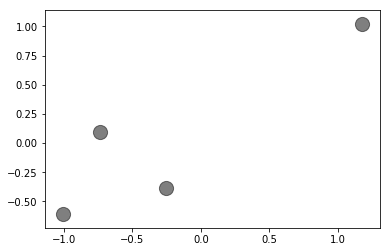

In [84]:
plt.scatter(centers[:,0], centers[:,1],c='black', s=200, alpha=0.5);

Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [85]:
km.labels_

array([2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 3, 1, 0, 1, 0, 2, 2,
       1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0,
       2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0,
       2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 3, 2, 2, 0, 1, 2, 1, 0, 0, 1,
       2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 2,
       2, 0, 1, 3, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0,
       0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 2,
       1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 2, 2,
       0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2,
       1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2,
       2, 0, 1, 0, 2, 3, 2, 2, 1, 2, 1, 0, 2, 2, 1,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [103]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])


### 9. Combine all three arrays a,b,c into a dataframe

In [109]:
a.shape

(100, 2)

In [112]:
d = np.concatenate((a,b,c),axis=0)

In [114]:
df=pd.DataFrame(d)

In [115]:
df.head()

,0,1
0,12.610050,-1.221534
1,10.242536,-0.780089
2,10.872448,1.129029
3,8.339812,-0.195513
4,10.327745,-3.231084


In [148]:
from scipy.stats import zscore
df=df.apply(zscore)

### 10. Use scatter matrix to print all the 3 distributions

C:\Users\kotav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kotav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


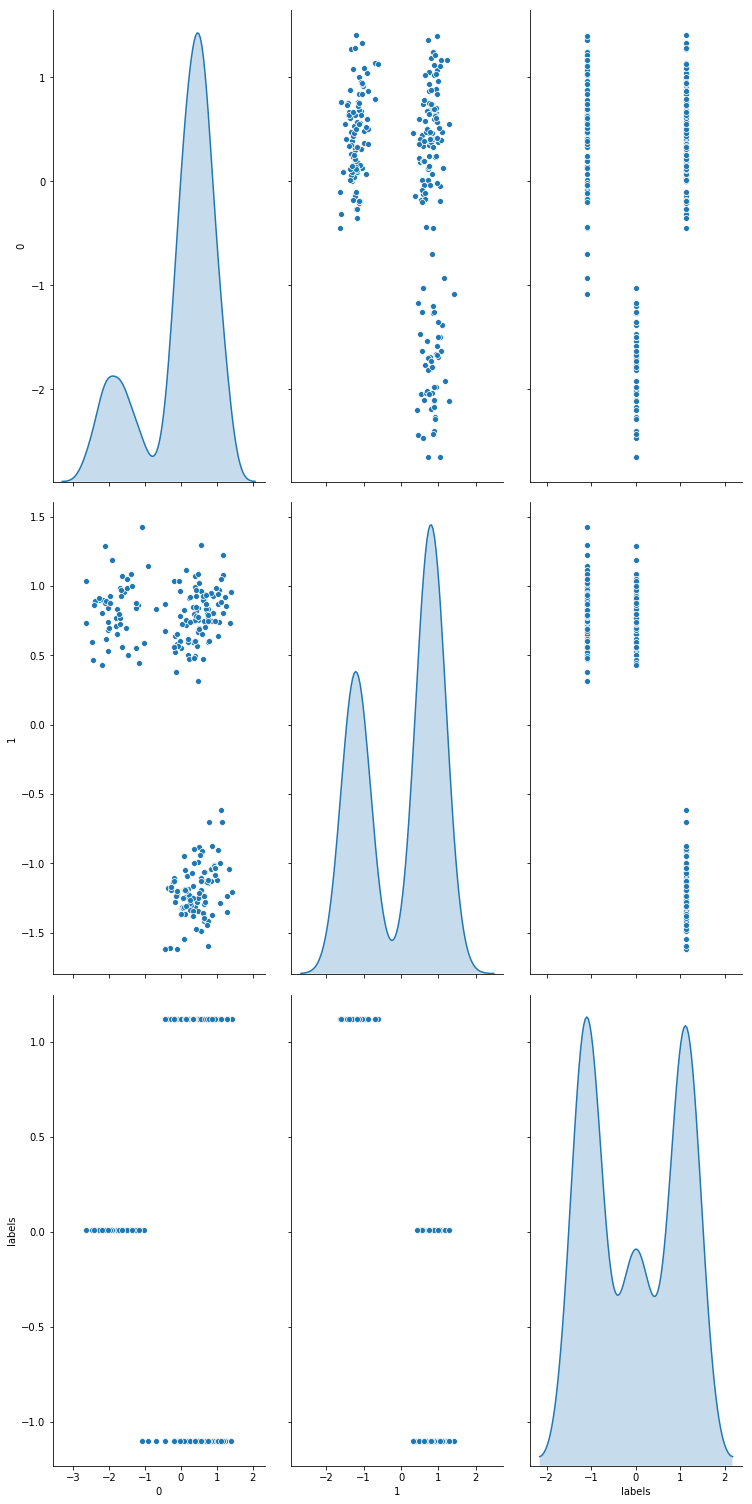

In [149]:
sns.pairplot(df, size=7,aspect=0.5 , diag_kind='kde')

In [150]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.stats import zscore
df=df.apply(zscore)
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(df)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [151]:
df['labels'] = model.labels_

In [152]:
df.groupby(["labels"]).count()

,0,1
labels,,
0,102,102
1,100,100
2,48,48


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C6F135898>,
      dtype=object)

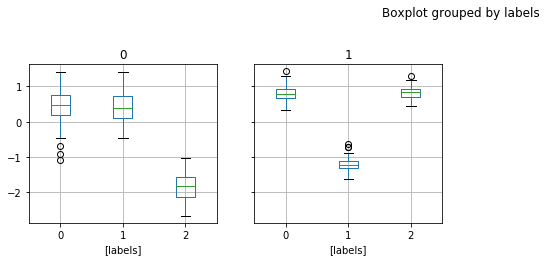

In [153]:
df.boxplot(by = 'labels',  layout=(3,4), figsize=(15, 10))

### 11. Find out the linkage matrix

In [174]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 
Z = linkage(df, 'ward',metric='euclidean')
c, coph_dists = cophenet(Z , pdist(df))
c

0.9393848269914785

Use ward as linkage metric and distance as Eucledian

In [175]:
distDf = pd.DataFrame(list(coph_dists), columns=['clusterDist'])
distDf['ecludianDist'] = pdist(df)

In [176]:
distDf.head(5)

,clusterDist,ecludianDist
0,2.531637,0.553987
1,2.531637,0.466183
2,4.926134,1.001223
3,2.531637,0.567645
4,4.926134,1.432022


In [177]:
distDf.corr()

,clusterDist,ecludianDist
clusterDist,1.000000,0.939385
ecludianDist,0.939385,1.000000


### 12. Plot the dendrogram for the consolidated dataframe

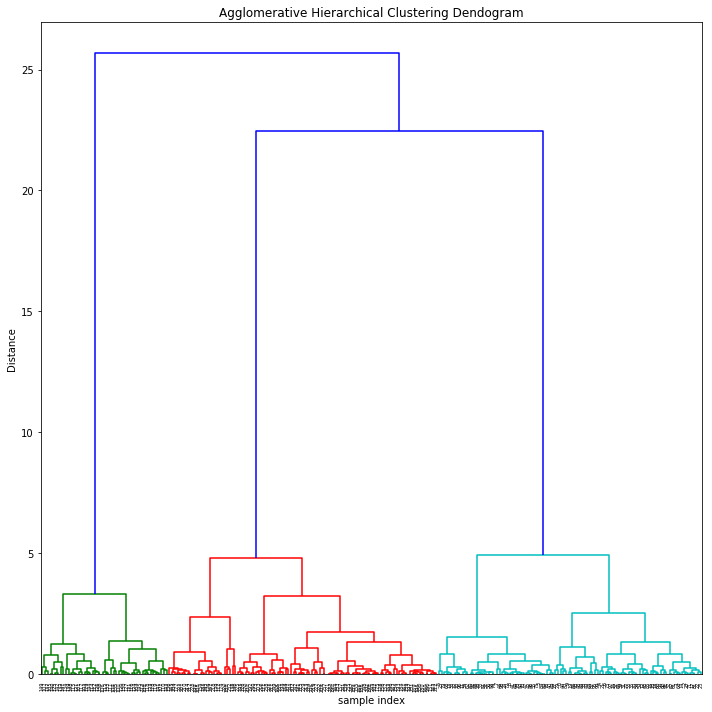

In [178]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

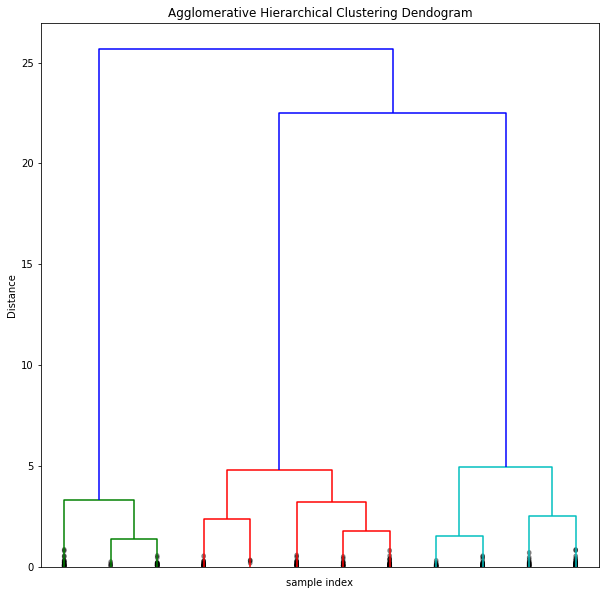

In [179]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

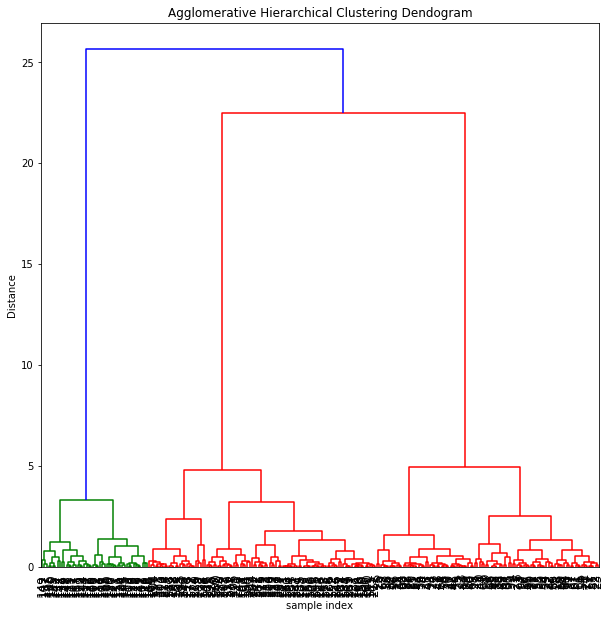

In [190]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
# Dendrogram
D = dendrogram(Z=Z, labels=df.index,  color_threshold=25,leaf_font_size=12)


### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [183]:
from scipy.cluster.hierarchy import fcluster
lab=fcluster(Z,20,criterion='distance')

In [184]:
lab

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

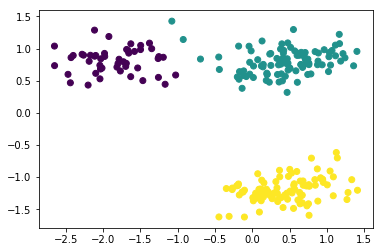

In [189]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=lab)